In [1]:
# !jupyter nbconvert --to script TimeGANmodel.ipynb

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from LossFunctions import mean_squared_error
from TimeGANmodel import TimeGAN
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../../Dataset/Boulder_Daily.csv')
df = pd.DataFrame(df['Energy__kWh_'])
df.head()

,Energy__kWh_
0,6.504
1,17.527
2,11.227
3,49.748
4,2.956


<AxesSubplot:>

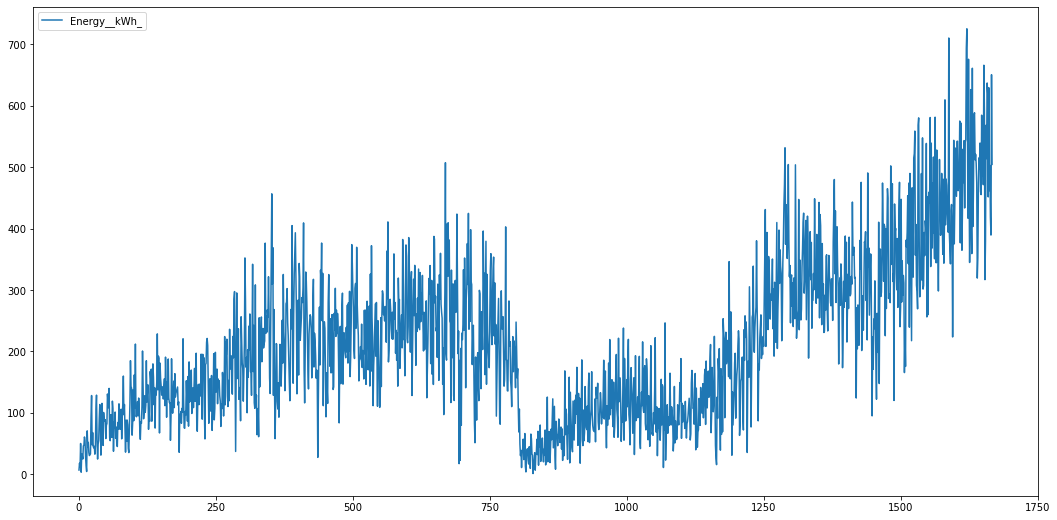

In [4]:
df.plot(figsize=(18,9))

In [5]:
time_series_data = MinMaxScaler().fit_transform(df)
time_series_data = df.values.astype(float)
time_series_data[0:5]

array([[ 6.504],
       [17.527],
       [11.227],
       [49.748],
       [ 2.956]])

In [6]:
# Split the data
train_rate = 0.8

split_index = int(len(time_series_data) * train_rate)

X_train, X_test = time_series_data[:split_index], time_series_data[split_index:] 
X_train.shape, X_test.shape

((1334, 1), (334, 1))

In [7]:
# Set TimeGAN parameters
timesteps = 24 
hidden_dim = 32
num_layers = 2
lambda_param = 0.1
eta_param = 10
learning_rate = 0.001
batch_size = 64
epochs = 50

In [8]:
# Create and train TimeGAN
timegan_model = TimeGAN(
    x=X_train,
    timesteps=timesteps,
    hidden_dim=hidden_dim,
    num_layers=num_layers,
    lambda_param=lambda_param,
    eta_param=eta_param,
    learning_rate=learning_rate,
    batch_size=batch_size
)

timegan_model.fit(epochs=epochs)

epoch: 1 autoencoder_loss: 0.406503 generator_loss: 8.008061 discriminator_loss: 2.585597
epoch: 2 autoencoder_loss: 0.214311 generator_loss: 3.467491 discriminator_loss: 1.874118
epoch: 3 autoencoder_loss: 0.074253 generator_loss: 3.609471 discriminator_loss: 2.961936
epoch: 4 autoencoder_loss: 0.028053 generator_loss: 3.395186 discriminator_loss: 2.315106
epoch: 5 autoencoder_loss: 0.017832 generator_loss: 4.217856 discriminator_loss: 2.050444
epoch: 6 autoencoder_loss: 0.015070 generator_loss: 3.092541 discriminator_loss: 2.707194
epoch: 7 autoencoder_loss: 0.012268 generator_loss: 2.900618 discriminator_loss: 2.509884
epoch: 8 autoencoder_loss: 0.007538 generator_loss: 2.939287 discriminator_loss: 2.114302
epoch: 9 autoencoder_loss: 0.006256 generator_loss: 2.984139 discriminator_loss: 1.980506
epoch: 10 autoencoder_loss: 0.008096 generator_loss: 3.712069 discriminator_loss: 1.680575
epoch: 11 autoencoder_loss: 0.006086 generator_loss: 2.931292 discriminator_loss: 2.130857
epoch: 1

In [41]:
# Forecasting for the next 10 steps
forecast_steps = 8
x_simulated, x_forecast = timegan_model.simulate(samples=len(X_test), forecast_steps=forecast_steps)

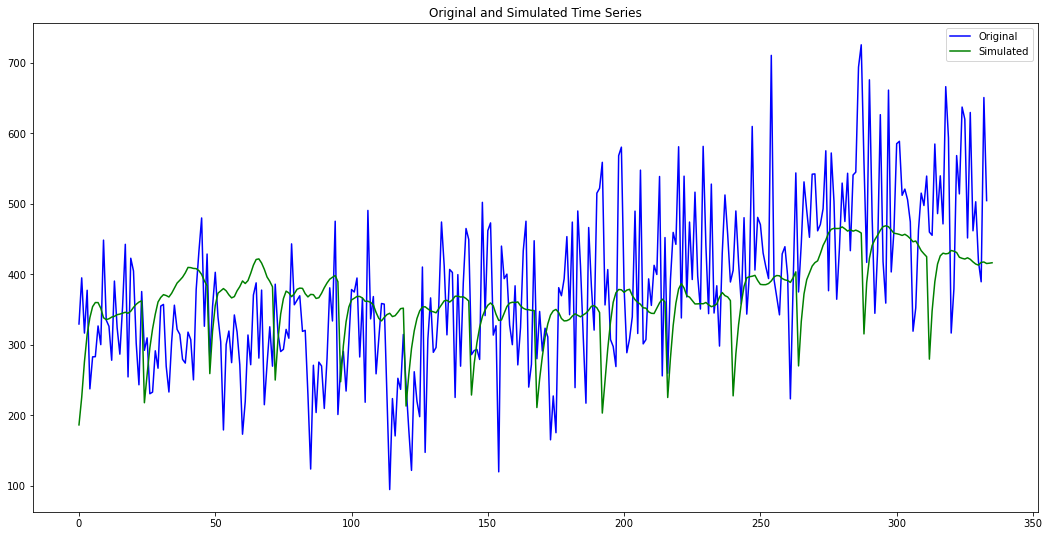

In [42]:
plt.figure(figsize=(18,9))
# Original data
plt.plot(X_test.flatten(), label='Original', color='blue')

# Simulated data
plt.plot(x_simulated.flatten(), label='Simulated', color='green')

plt.legend()
plt.title('Original and Simulated Time Series')
plt.show()

In [43]:
# Check lengths
print("X_test length:", len(X_test))
print("x_simulated length:", len(x_simulated))

# Trim or pad sequences if needed
min_length = min(len(X_test), len(x_simulated))
X_test = X_test[:min_length]
x_simulated = x_simulated[:min_length]

# Calculate MSE
mse = mean_squared_error(X_test, x_simulated)
print(f'Mean Squared Error: {mse}')

X_test length: 334
x_simulated length: 336
Mean Squared Error: 11095.065702641277
